In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing the dataset as pandas dataframe
df = pd.read_csv('StudentsPerformance.csv')
df.head(5)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Datachecks to Perform

1. Checking for missing values
2. Check for duplicates
3. Check data types
4. Check the number of unique values of each column
5. Check statistics of data set
6. Check various categories present in the different categorial column

In [4]:
#Checking for missing values

df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Observation: there are no missing values

In [6]:
#checking for duplicates
df.duplicated().sum()

np.int64(0)

Observation: there are no duplicate values

In [7]:
#check for the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
#checking the unique values for each column
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [9]:
#check statistics of the dataset
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insights from the dataset

1. All mean values are very close to each other
2. All standard deviations are very close to each other
3. Minimum is 0 for maths, 17 for reading and 10 for writing

In [10]:
# Exploring data

print("Categories in gender variable:  ", end="")
print(df['gender'].unique())

print("Categories in race variable:  ", end="")
print(df['race/ethnicity'].unique())

print("Categories in parental level of education variable:  ", end="")
print(df['parental level of education'].unique())

print("Categories in lunch variable:  ", end="")
print(df['lunch'].unique())

print("Categories in test preparation course variable:  ", end="")
print(df['test preparation course'].unique())


Categories in gender variable:  ['female' 'male']
Categories in race variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable:  ['standard' 'free/reduced']
Categories in test preparation course variable:  ['none' 'completed']


In [12]:
# define numerical and categorical columns

numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features {}'.format(len(numeric_features), numeric_features))
print('We have {} categorical features {}'.format(len(categorical_features), categorical_features))


We have 3 numerical features ['math score', 'reading score', 'writing score']
We have 5 categorical features ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [13]:
#Adding columns for calculating total score and average score
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average_score'] = df['total_score'] / 3

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


Exploring Data (Visualisation)

Visualise average score distribution to make some conclusion

1/ Histogram
2/ Kernel Distribution Function (KDE)

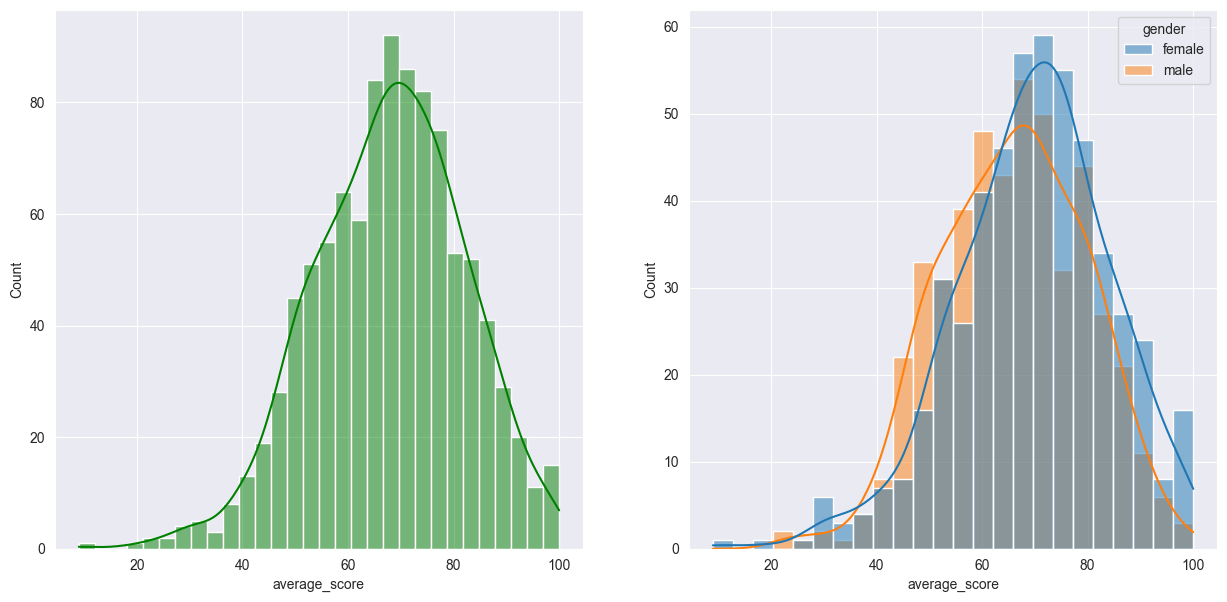

In [16]:
fig, axs = plt.subplots(1,2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df, x = 'average_score', bins= 30, kde=True, color='green')
plt.subplot(122)
sns.histplot(data = df, x = 'average_score', kde=True, hue='gender')
plt.show()